In [2]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.constants import pi

%matplotlib inline

In [89]:

class Coldpool:
    def __init__(self, x_c=0.0, y_c=0.0, t0=0.0, v=1.0, **kwargs):
        self.x_c, self.y_c = x_c, y_c
        self.t0 = t0
        self.v = v
        self.kwargs = kwargs
        
    def plot(self, t, **kw):
        th = np.linspace(0., 2*pi, 100) 
        kwargs = dict(self.kwargs)
        kwargs.update(kw)
        dt = t - self.t0
        if dt < 0:
            pass
        else:
            if dt == 0:
                label = "(x,y)=({}.{}), t0={}".format(self.x_c, self.y_c, self.t0)
                l, = plot.plot(self.x_c, self.y_c, marker='.', linestyle='', label=label)
            else:
                label = None
                l, = plot.plot(
                    self.x_c + dt*self.v*np.cos(th),
                    self.y_c + dt*self.v*np.sin(th),
                    label=label,
                    **kwargs
                )
                
            if not 'color' in kwargs:
                self.kwargs['color'] = l.get_color()

In [90]:
import itertools

LINESTYLES = ['-', ':', '--', '-.']

class ColdpoolCollection:
    def __init__(self, kwarg_sets):
        self.coldpools = [Coldpool(**kw) for (n, kw) in enumerate(kwarg_sets)]
        
    def plot(self, t, **kwargs):
        for cp in self.coldpools:
            cp.plot(t=t, **kwargs)
            
    def plot_evolution(self, times):
        linestyles = itertools.cycle(LINESTYLES)
        for t in times:
            ls = linestyles.next()
            self.plot(t=t, linestyle=ls)

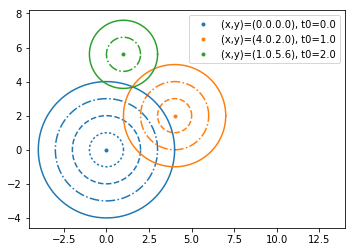

In [109]:
coldpools = ColdpoolCollection([
    dict(),
    dict(t0=1., x_c=4.0, y_c=2.),
    dict(t0=2., x_c=1.0, y_c=5.6)
])

coldpools.plot_evolution(times=range(5))
    
plot.gca().set_aspect(1)
plot.legend(loc='upper right')
plot.xlim(None, 14.)

plot.savefig('three-rings.png', dpi=400)

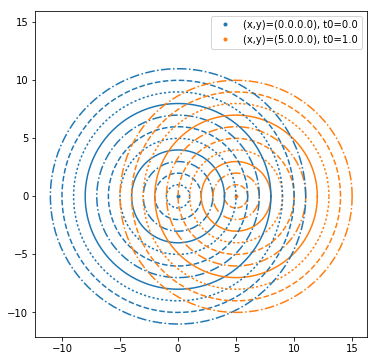

In [112]:
coldpools = ColdpoolCollection([
    dict(),
    dict(t0=1., x_c=5.0, y_c=0.),
])

plot.figure(figsize=(6,6))
coldpools.plot_evolution(times=range(12))
    
plot.gca().set_aspect(1)
plot.legend(loc='upper right')
plot.ylim(None, 16)
plot.savefig('two-rings.png', dpi=400)

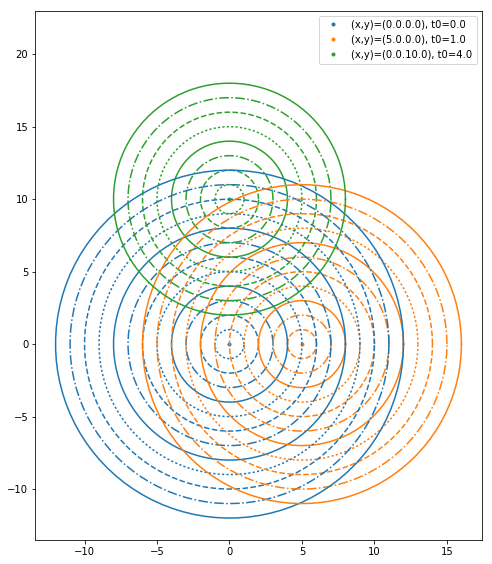

In [125]:
coldpools = ColdpoolCollection([
    dict(),
    dict(t0=1., x_c=5.0, y_c=0.),
    dict(t0=4., x_c=0.0, y_c=10.),
])

plot.figure(figsize=(8, 12))
coldpools.plot_evolution(times=range(0,13))
    
plot.gca().set_aspect(1)
plot.legend(loc='upper right')
plot.ylim(None, 23)
plot.savefig('three-large-rings.pdf', dpi=400)